In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [80]:
# Set features. This will also be used as your x values.
df.columns

#Columns that are likely to be significant (Error measurement columns are excluded)
#koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag
X = df[['koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_insol','koi_teq','koi_period','koi_srad','koi_slogg','koi_kepmag']]


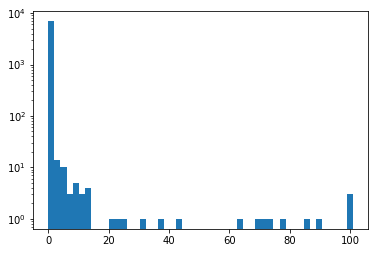

In [5]:
n_bins=50
x=X['koi_impact']
plt.hist(x, bins=n_bins)
plt.yscale("log")

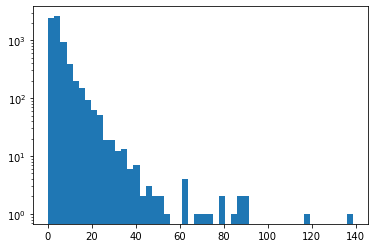

In [6]:

n_bins=50
x=X['koi_duration']
plt.hist(x, bins=n_bins)
plt.yscale("log")

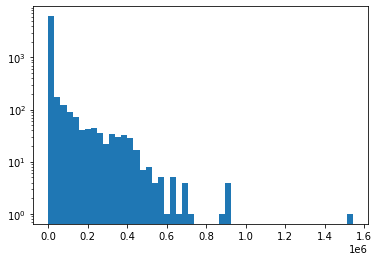

In [7]:
n_bins=50
x=X['koi_depth']
plt.hist(x, bins=n_bins)
plt.yscale("log")

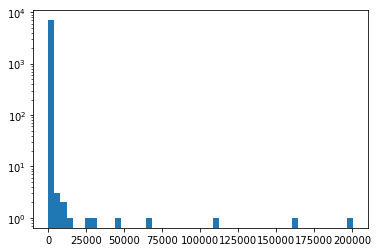

In [72]:
n_bins=50
x=X['koi_prad']
plt.hist(x, bins=n_bins)
plt.yscale("log")


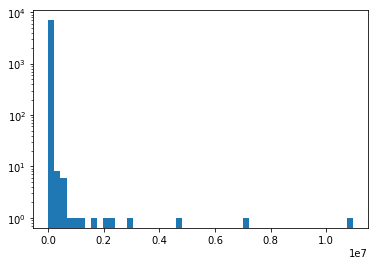

In [73]:
n_bins=50
x=X['koi_insol']
plt.hist(x, bins=n_bins)
plt.yscale("log")


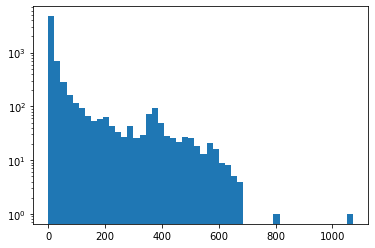

In [75]:
n_bins=50
x=X['koi_period']
plt.hist(x, bins=n_bins)
plt.yscale("log")

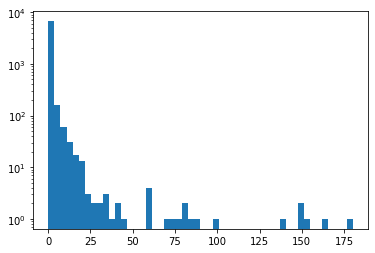

In [77]:
n_bins=50
x=X['koi_srad']
plt.hist(x, bins=n_bins)
plt.yscale("log")

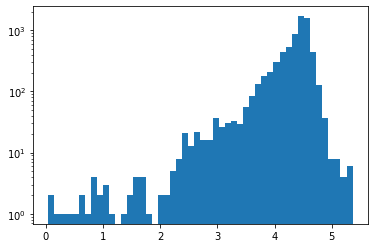

In [79]:
n_bins=50
x=X['koi_slogg']
plt.hist(x, bins=n_bins)
plt.yscale("log")

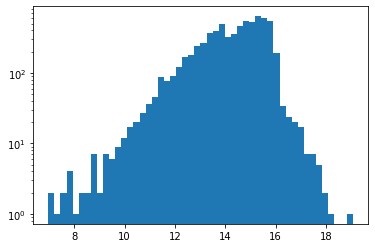

In [82]:
n_bins=50
x=X['koi_kepmag']
plt.hist(x, bins=n_bins)
plt.yscale("log")
#Tentative variable: koi_kepmag,koi_slogg,koi_period

In [83]:
X.describe()

,koi_impact,koi_duration,koi_depth,koi_prad,koi_insol,koi_teq,koi_period,koi_srad,koi_slogg,koi_kepmag
count,6991.000000,6991.000000,6.991000e+03,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.730631,5.549368,2.391190e+04,121.194193,8.263769e+03,1095.152768,56.191248,1.740749,4.305049,14.271508
std,3.346956,6.425205,8.241240e+04,3519.737626,1.775255e+05,856.234809,117.570962,5.903415,0.439238,1.350802
min,0.000000,0.167000,7.500000e+00,0.140000,2.000000e-02,92.000000,0.259820,0.109000,0.047000,6.966000
25%,0.198000,2.446000,1.604000e+02,1.400000,2.227000e+01,554.000000,2.620126,0.829000,4.209000,13.455000
50%,0.539000,3.793000,4.245000e+02,2.420000,1.466700e+02,888.000000,8.947426,0.999000,4.436000,14.534000
75%,0.891000,6.197500,1.533250e+03,15.965000,9.006700e+02,1397.500000,34.282605,1.357000,4.543000,15.322000
max,100.806000,138.540000,1.541400e+06,200346.000000,1.094755e+07,14667.000000,1071.232624,180.013000,5.364000,19.065000


0       0.586
1       0.969
2       1.276
3       0.701
4       0.762
        ...  
6986    0.765
6987    1.252
6988    0.043
6989    0.147
6990    0.134
Name: koi_impact, Length: 6991, dtype: float64

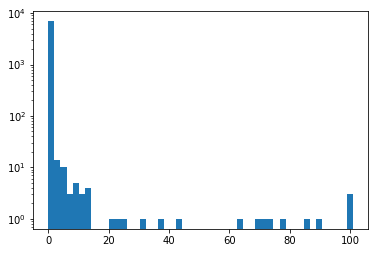

In [12]:
n_bins=50
x=X['koi_impact']
plt.hist(x, bins=n_bins)
plt.yscale("log")

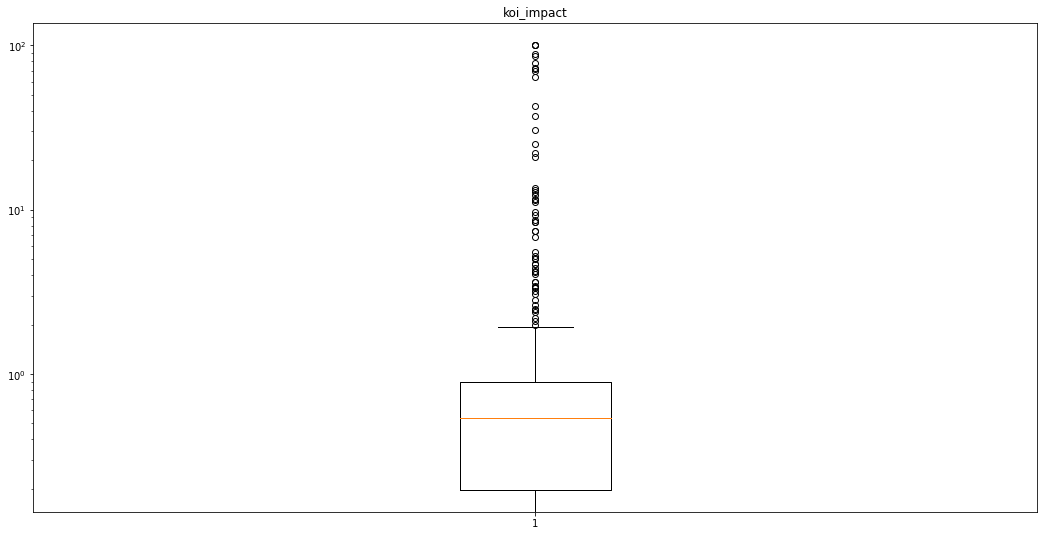

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)
# basic plot
ax.boxplot(X['koi_impact'])
ax.set_title('koi_impact')
plt.yscale("log")












#['koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_insol','koi_teq']

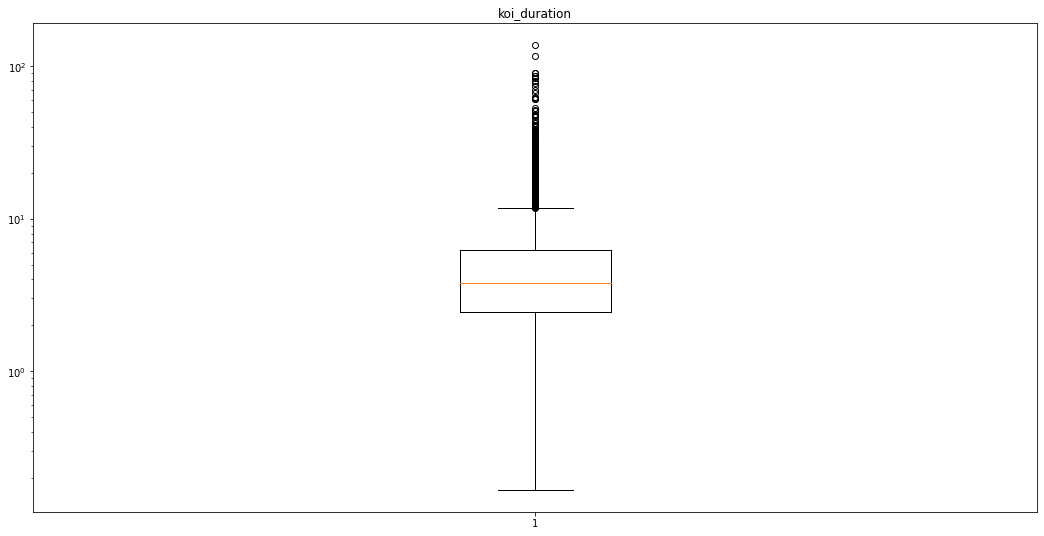

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)
# notched plot
ax.boxplot(X['koi_duration'])
ax.set_title('koi_duration')
plt.yscale("log")

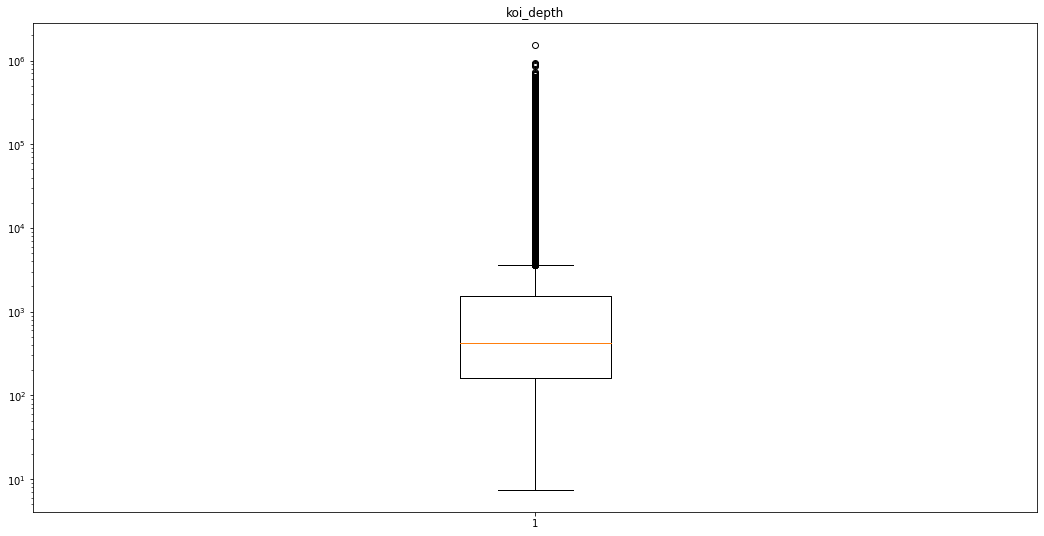

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)
# change outlier point symbols
ax.boxplot(X['koi_depth'])
ax.set_title('koi_depth')
plt.yscale("log")

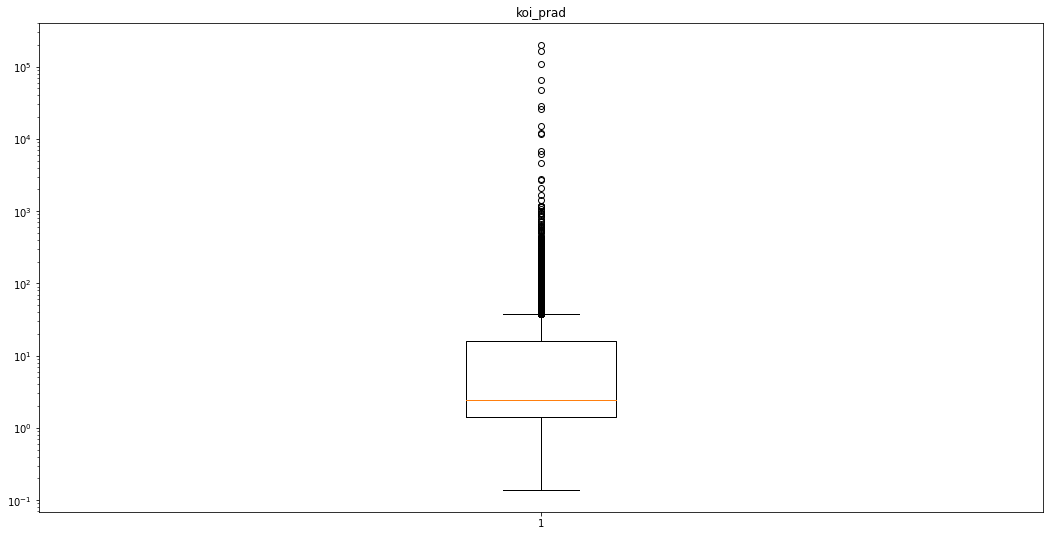

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)
# basic plot
ax.boxplot(X['koi_prad'])
ax.set_title('koi_prad')
plt.yscale("log")


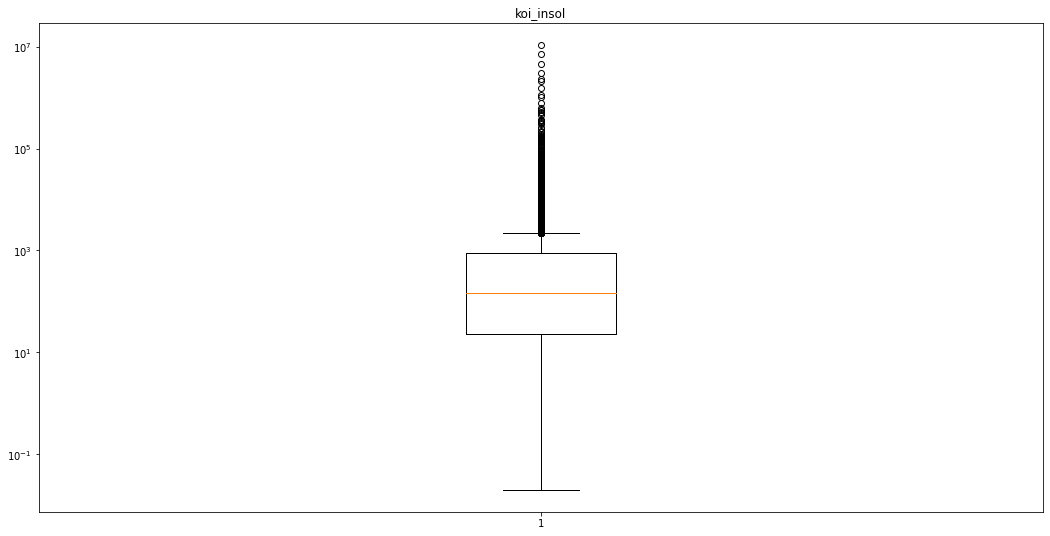

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)

# notched plot
ax.boxplot(X['koi_insol'])
ax.set_title('koi_insol')
plt.yscale("log")

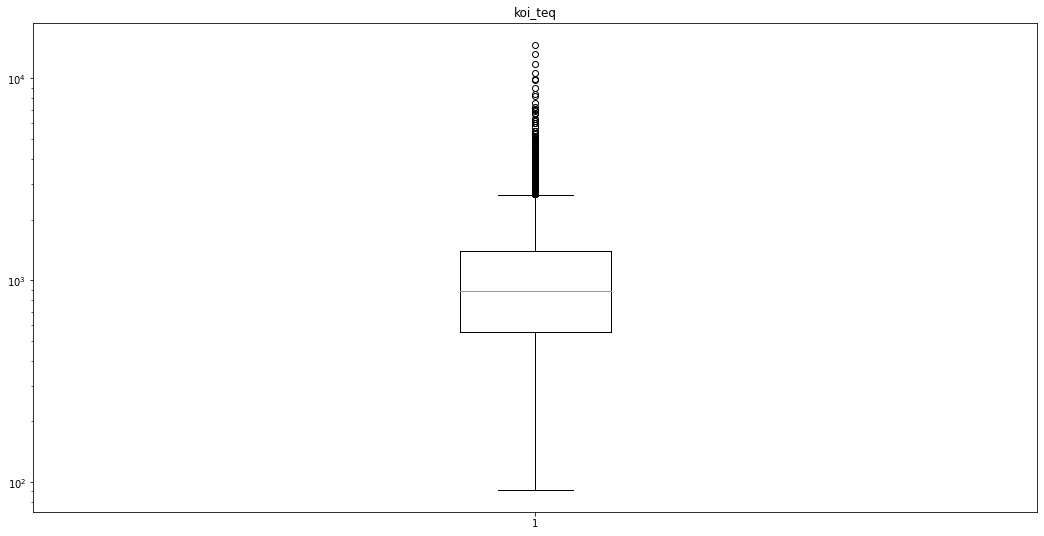

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)
# change outlier point symbols
ax.boxplot(X['koi_teq'])
ax.set_title('koi_teq')
plt.yscale("log")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.set_size_inches(18, 9)